# K-means 

The goal of *K-means* is to find $k$ clusters, or groups, within a dataset. Start by reading the description of the algorithm given in section *7.3* of Alpaydin. The resulting pseudo-code for the algorithm to find $k$ clusters, is shown there in figure *7.3*:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Repeat
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$
* Until $m_i$ converge

There are a couple of videos by Andrew Ng on the topic that might also be helpful to understand what the algorithm does. The notation here is a little different, but the ideas are exactly the same:

Basic description of the algorithm


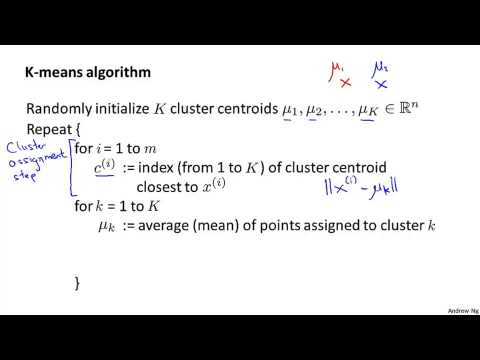

Cost function that can be used to check for convergence


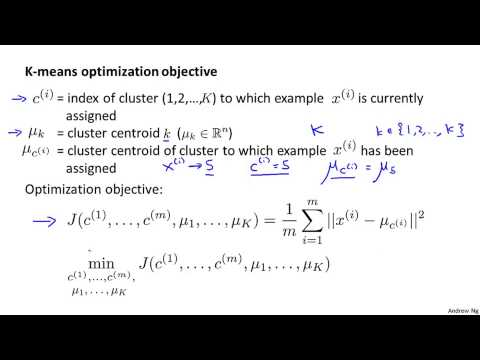

In [6]:
from IPython.display import YouTubeVideo
import numpy as np

print('Basic description of the algorithm')
display(YouTubeVideo('6u19018FeHg'))
print('Cost function that can be used to check for convergence')
display(YouTubeVideo('omcDeBY4lGE'))


## Implementing the algorithm [18 pts]

For your code, make **functions** (required in order to get the points) for each of the following components of the k-means algorithm:

* `init_clusters`: Randomly initialize means from the data [1 pt]
* `distance`: Compute the distance between 2 points [1 pt]
* `cluster_assignment`: Compute the matrix $b$ containing the assignments of points to clusters, based on the current means [4 pts]
* `compute_means`: Compute the matrix $m$ containing the computed mean vectors, based on the current assignment of clusters [3 pts]
* `plot_clusters`: Plot the means (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted) [4 pts]
* `is_converged`: Determine if the algorithm has converged based on the sets of current and new means. HINT: use a threshold here (for example 0.05). [2 pts]
* `kmeans`: Combine all these functions in a general k-means function [3 pts]

To test the code, you will be making use of the iris dataset, which is imported in the cell below. 

In [ ]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:, 2:]

### `init_clusters` [1 pt]

This function should randomly initialize means from the data. You can find your own solution, or use Andrew Ng's solution from the video below.

Choosing the starting points for the means


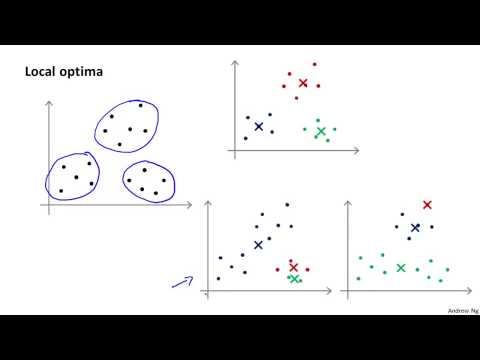

In [7]:
print('Choosing the starting points for the means')
display(YouTubeVideo('wniLibHEE2Y'))

In [8]:
def init_clusters(data, k):
    ### YOUR SOLUTION HERE
    return np.random.permutation(data)[:k, :]

In [23]:
assert True

## Showing the results [4pt]

To show your code works, run the algorithm on the Iris dataset using only the last 2 variables of the data. Use a value of 3 for $k$ and plot the means with their assignments. Start by running the algorithm step by step and plotting for each step. Start with the random means and then show at least 2 more steps, to show the means moving as the algorithm iterates. Finally, show the resulting plot where the means have converged and the algorithm has stopped.


Iteration:  0


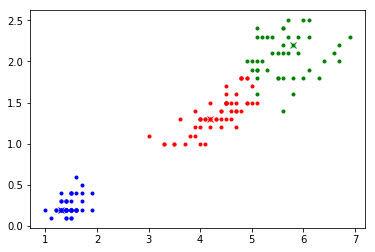

Iteration:  1


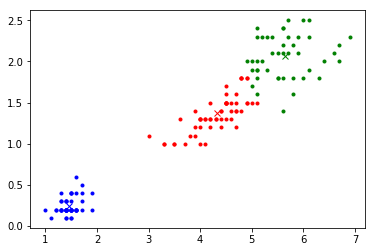

Iteration:  2


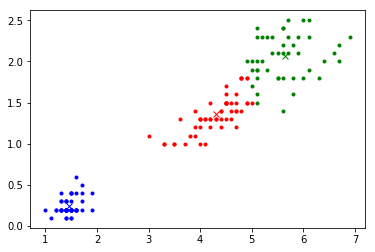

Converged Result


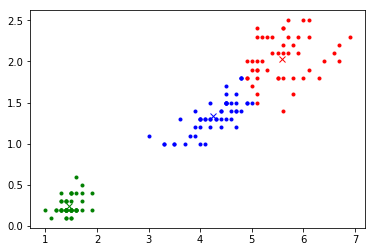

In [2]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:, 2:]

def init_clusters(data, k):
    return np.random.permutation(data)[:k, :]

def distance(p1, p2):
    return math.sqrt(np.sum(np.square(p1 - p2)))

def cluster_assignment(data, means):
    b = np.zeros((data.shape[0], means.shape[0]), dtype=float)
    for t, elem in enumerate(data):
        b[t][np.argmin([distance(elem, m) for m in means])] = 1
    return b

def compute_means(data, b):
    return np.array([np.sum(data[b[:, i] == 1, :], axis=0) / np.sum(b[:, i]) for i in range(b.shape[1])])

def plot_clusters(data, b, means):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(b.shape[1]):
        a = b[:, i] == 1
        plt.plot(data[a, 0], data[a, 1], '.'+colors[i])
    for i in range(means.shape[0]):
        plt.plot(means[i, 0], means[i, 1], 'x'+colors[i])
    plt.show()

def is_converged(old, new, thres=0.05):
    return sum([distance(old[i], new[i]) for i in range(old.shape[0])]) < thres
        
def kmeans(data, k):
    new_means = init_clusters(data, k)
    means = np.add(new_means, 1)
    while not is_converged(means, new_means):
        means = new_means
        b = cluster_assignment(data, means)
        new_means = compute_means(data, b)
    return means


means = init_clusters(data, 3)
for i in range(3):
    print("Iteration: ", i)
    b = cluster_assignment(data, means)
    plot_clusters(data, b, means)
    means = compute_means(data, b)
    
print("Converged Result")
means = kmeans(data, 3)
b = cluster_assignment(data, means)
plot_clusters(data, b, means)

## Elbow Method [8 pts]

For this dataset we have the benefit of already knowing the number of clusters. However, even if the number clusters is not known or set before hand, there ways to solve the clustering problem. One such possbile approach is the *elbow method*. Watch the video from Andrew on the topic below or find another resource describing it.

[Choosing the number of clusters](https://www.youtube.com/watch?v=izCbbMbRWHw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=81)

Now extend your implementation to include the following:

* `cost`: Create a sensible cost function that is minimized when steps of the algorithm are done. Use the data and the current values of $b$ and $m$. [2 pts]
* `average_cost`: Create a function to compute the converged cost of a specific value of $k$ repeatedly and averaging this. [2 pts]
* Running your code many times will most likely result in an error in your `compute_means` function at some point. Find out what is causing the error and create a new version of `compute_means` that solves this problem in some sensible way. [2 pts]
    * *Note: If many runs of the algorithm do not result in any errors at all, then your old `compute_means` was already correct and you may just use that.*
* Compute the average cost for k values $1$ to $10$ and combine them in a plot. Briefly discuss if this plot corresponds with your expectations. [2 pts]

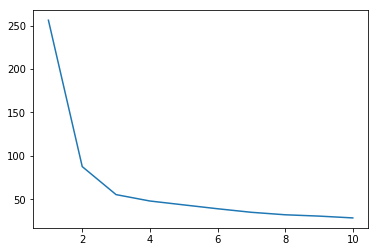

In [3]:
def cost(data, means, b):
    c = 0
    for i in range(means.shape[0]):
        c += sum([distance(means[i, :], elem) for elem in data[b[:, i] == 1, :]])
    return c

def average_cost(data, k, n):
    c = 0
    for i in range(n):
        m = kmeans(data, k)
        b = cluster_assignment(data, m)
        c += cost(data, m, b)
    return c / n

def compute_means(data, b):
    means = []
    for i in range(b.shape[1]):
        s = np.sum(b[:, i])
        if s == 0:
            means.append(init_clusters(data, 1)[0])
        else:
            means.append(np.sum(data[b[:, i] == 1, :], axis=0) / s)
    return np.array(means)

k_vals = range(1, 11)
c_vals = []
for k in k_vals:
    c_vals.append(average_cost(data, k, 10))

plt.plot(k_vals, c_vals)
plt.show()